# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# pip install citipy

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

99f96a0396de356f1b82d64d481006c5


## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

19

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# OpenWeatherMap API Key
api_key = weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_list = []
country_list = []
lat_list = []
lng_list = []
temperature_list = []
cloud_list = []
humidity_list = []
wind_speed_list = []

record_counter = 0

print('------------------------')
print('Beginning Weather Check')
print('------------------------')

for city in cities:
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will
    # not have have records in all the cities generated by CityPy module
    try: 
    
        query_url = url + "&q=" + city
        # Get weather data
        response = requests.get(query_url).json()

    #     response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        temperature_list.append(response['main']['temp_max'])    
        cloud_list.append(response["clouds"]["all"])
        humidity_list.append(response["main"]["humidity"])

    #    date_list.append(response["dt"])
        wind_speed_list.append(response["wind"]["speed"])
        record_counter += 1
        print('Retrieving data from city of {} ==> Record {}'.format(city, record_counter))
    
#         # If no record found "skip" to next city
    except:
        print('-------------------------')
        print("There are not enough weather information{}. Skip record.")
        print('-------------------------')
        #         print(query_url)


    pass
    
    
    
    
    


print('-------------------------')
print('Finished weather check')
print('-------------------------')

------------------------
Beginning Weather Check
------------------------
Retrieving data from city of tessalit ==> Record 1
Retrieving data from city of esperance ==> Record 2
Retrieving data from city of ushuaia ==> Record 3
Retrieving data from city of narsaq ==> Record 4
Retrieving data from city of mount gambier ==> Record 5
Retrieving data from city of carupano ==> Record 6
Retrieving data from city of carnot ==> Record 7
Retrieving data from city of victoria ==> Record 8
Retrieving data from city of mataura ==> Record 9
Retrieving data from city of mar del plata ==> Record 10
Retrieving data from city of rikitea ==> Record 11
Retrieving data from city of nome ==> Record 12
Retrieving data from city of mahon ==> Record 13
Retrieving data from city of chuy ==> Record 14
Retrieving data from city of punta arenas ==> Record 15
Retrieving data from city of bredasdorp ==> Record 16
Retrieving data from city of isangel ==> Record 17
There are not enough weather information for city of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
# move data to dictionary and the DF
weather_data_dict = {
    "City": city_list,
    "Lat":lat_list, 
    "Lng":lng_list, 
    "Country":country_list,
    "Max.Temp": temperature_list,    
    "Humidity": humidity_list,   
    "Cloudiness":cloud_list, 
    "Wind Speed":wind_speed_list
}

# Create a data frame from dictionary
weather_data_df = pd.DataFrame(weather_data_dict)

# Display count of weather data values 
# weather_data_df.count()
weather_data_df



,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
0,Tessalit,20.1986,1.0114,ML,24.90,8,0,3.87
1,Esperance,-33.8667,121.9000,AU,16.00,94,0,5.66
2,Ushuaia,-54.8000,-68.3000,AR,12.00,47,75,5.14
3,Narsaq,60.9167,-46.0500,GL,-1.00,40,75,5.14
4,Mount Gambier,-37.8333,140.7667,AU,15.00,88,0,4.12
5,Carupano,10.6678,-63.2585,VE,26.25,74,100,4.65
6,Carnot,4.9409,15.8665,CF,22.10,90,100,0.41
7,Hong Kong,22.2855,114.1577,HK,22.21,88,15,2.26
8,Mataura,-46.1927,168.8643,NZ,11.11,88,100,1.34
9,Mar del Plata,-38.0023,-57.5575,AR,21.75,46,0,6.17


In [52]:
# Save data frame to CSV
# i have anticipated step
weather_data_df.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
# humid_100_df = weather_data_df.loc[reduced_df["Drug Regimen"] == 100,:]

humid_100_df = weather_data_df.loc[weather_data_df["Humidity"] == 94,:]

humid_100_df

,City,Lat,Lng,Country,Temp,Humidity,Cloudiness,Wind Speed
1,Esperance,-33.8667,121.9000,AU,16.0,94,0,5.66
16,Isangel,-19.5500,169.2667,VU,21.0,94,20,5.27


In [30]:
#  Get the indices of cities that have humidity over 100%.
humid_100_df.index

Int64Index([1, 16], dtype='int64')

In [39]:
# # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# # Passing "inplace=False" will make a copy of the city_data DataFrame, which we call 
# # "clean_city_data".

# # clean_city_data_df = weather_data_df.drop(weather_data_df["Humidity"] == 94.index, inplace=False)
# # clean_city_data_df = weather_data_df.loc(weather_data_df["Humidity"] == 94, inplace=False)
# clean_city_data_df = weather_data_df.loc(weather_data_df["Humidity"] == 94)


# #  clean_city_data_df =df.drop(df[df.score < 50].index, inplace=True)
# clean_city_data_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [40]:
# weather_data_df.columns

Index(['City', 'Lat', 'Lng', 'Country', 'Temp', 'Humidity', 'Cloudiness',
       'Wind Speed'],
      dtype='object')

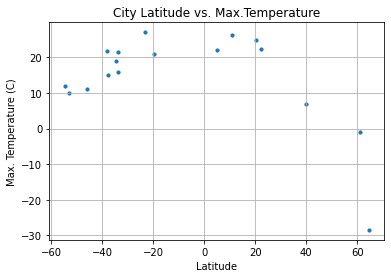

In [54]:

# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Max.Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max.Temperature")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

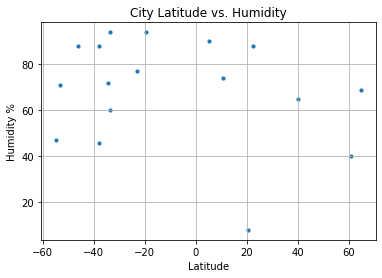

In [47]:

# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

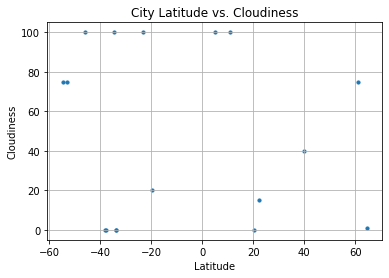

In [48]:
# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

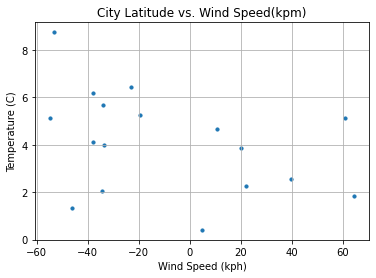

In [55]:
# Scatter plot
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(kpm)")
plt.ylabel("Temperature (C)")
plt.xlabel("Wind Speed (kph)")
plt.grid(True)

# Save the figure
plt.savefig("figures/Latitude_vs_Wind.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [79]:
# # Get weight and tumor volume from previous dataframe
# max_temp = weather_data_df["Max.Temp"]
# lat = weather_data_df["Lat"]
# northern_lat = []
# lower_limit = 0
# upper_limit = 90

# lat
# weather_data_df
# # for item in lat:
# #     if lat(item) > lower_limit:
# #         northern_lat.append(item)
        
# # northern_lat

# # lat = lat.loc(lat["Lat"] > 0)




# #---------------------------------

# # Calculate linear regression for above values weight and tumor volume
# (slope, intercept, rvalue, pvalue, stderr) = linregress(max_temp, lat)
# regress_values = max_temp * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

# # clean_city_data_df = weather_data_df.loc(weather_data_df["Humidity"] == 94)
# # # Calculate the correlation coefficient between mouse weight and average tumor volume
# # correlation = st.pearsonr(max_temp,lat)                 # pearson method
# # correlation = round(correlation[0],2)                 # round value with 2 decimals
# # # Print answer of above calculation
# # print(f"The correlation coeficient between Max.Temperature and Latitude is {correlation}")





# plt.figure(figsize=(14, 8))                                        # Set up total size of graph

# # Plot linear regression on top of scatter plot ----------------------------------------------------
# # Plot scatter
# plt.scatter(max_temp, lat,
#             s=20, 
#             color="yellow",
#             edgecolors='black')

# # plot linear regression with variables
# plt.plot(max_temp,regress_values,"r-")

# # Show formula for linear regression
# plt.annotate(line_eq,(18.1,41),              # position of line formula within x, y values in graph
#              fontsize=14.5,
#              color="red")  

# # Add labels and title to plot
# plt.title("Northern Hemisphere - Linear regression of Max Temp. vs Latitude",fontsize =18)
# plt.xlabel("Max. Temperature (C)",fontsize =16)
# plt.ylabel("Latitude",fontsize =16)
# plt.xticks(fontsize=13)
# plt.yticks(np.arange(0, 90, 10.0))  
# plt.yticks(fontsize=13)
# plt.grid()

# # Save the figure
# plt.savefig("figures/Regression_Latitude_vs_Temp.png")

# # Show plot
# plt.show()



,City,Lat,Lng,Country,Max.Temp,Humidity,Cloudiness,Wind Speed
0,Tessalit,20.1986,1.0114,ML,24.90,8,0,3.87
1,Esperance,-33.8667,121.9000,AU,16.00,94,0,5.66
2,Ushuaia,-54.8000,-68.3000,AR,12.00,47,75,5.14
3,Narsaq,60.9167,-46.0500,GL,-1.00,40,75,5.14
4,Mount Gambier,-37.8333,140.7667,AU,15.00,88,0,4.12
5,Carupano,10.6678,-63.2585,VE,26.25,74,100,4.65
6,Carnot,4.9409,15.8665,CF,22.10,90,100,0.41
7,Hong Kong,22.2855,114.1577,HK,22.21,88,15,2.26
8,Mataura,-46.1927,168.8643,NZ,11.11,88,100,1.34
9,Mar del Plata,-38.0023,-57.5575,AR,21.75,46,0,6.17


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression